In [161]:
import numba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [162]:
df = pd.read_csv('ps.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [164]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<AxesSubplot:>

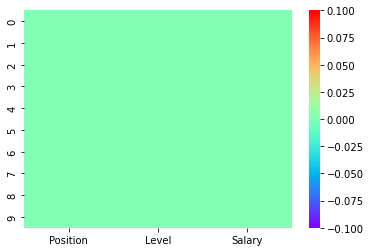

In [165]:
sns.heatmap(df.isnull(),yticklabels=True,cmap='rainbow')

# We don't need encoding coz level is already there

In [166]:
X = df.iloc[:,1:2]
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [167]:
Y = df.iloc[:,2:]
Y.head()

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000


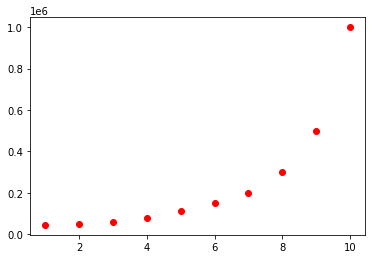

In [168]:
plt.scatter(X,Y,c='red')

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [170]:
LR = LinearRegression()

In [171]:
LR.fit(X_train,Y_train)
y_pred = LR.predict(X_test)
score = r2_score(Y_test,y_pred)
score

0.8451346684575975

In [172]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [173]:
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


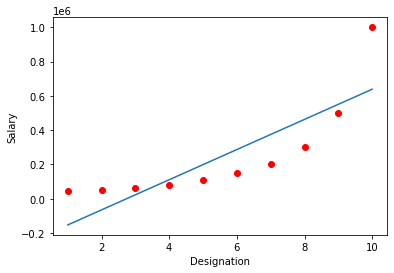

In [174]:
plt.scatter(X,Y,c='red')
plt.plot(X,LR.predict(X))
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [175]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [176]:
level = float(input())
LR.predict([[level]])

8


array([[462844.82758621]])

In [177]:
level = float(input())
LR.predict([[level]])

5


array([[199181.03448276]])

In [178]:
level = float(input())
LR.predict([[level]])

3


array([[23405.17241379]])

In [179]:
level = float(input())
LR.predict([[level]])

10


array([[638620.68965517]])

# Polynomial Regression of degree 2

In [180]:
df = pd.read_csv('ps.csv')

In [181]:
X = df.iloc[:,1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [182]:
Y = df.iloc[:,2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [183]:
PF = PolynomialFeatures(degree=2)
X = PF.fit_transform(X)

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
PR2 = LinearRegression()

In [185]:
PR2.fit(X_train,Y_train)
y_pred = PR2.predict(X_test)
score = r2_score(Y_test,y_pred)
score

0.7896604512664295

# Again with degree 5

In [190]:
X = df.iloc[:,1:2]
Y = df.iloc[:,2:]

In [191]:
PF = PolynomialFeatures(degree=5)
X = PF.fit_transform(X)

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
PR5 = LinearRegression()
PR5.fit(X_train,Y_train)
y_pred = PR5.predict(X_test)
score = r2_score(Y_test,y_pred)
score

0.9949078503291525

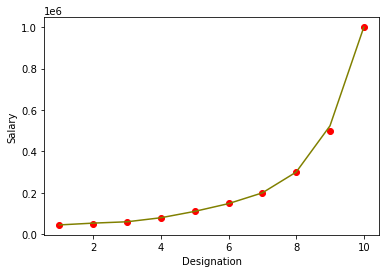

In [196]:
X = df.iloc[:,1:2]
plt.scatter(X,Y,c='red')
plt.plot(X,PR5.predict(PF.fit_transform(X)),c='olive')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()